In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def aoc_2021_13_1(file_path):
    """--- Day 13: Transparent Origami --- Part One"""
    
    with open(file_path) as f:
        aoc_read = f.read().split('\n\n')
        dot_read, fold_read = aoc_read
    
    # transparent paper dimension
    dot_idx = [tuple(int(idx) for idx in d.split(',')) for d in dot_read.split('\n')]
    no_x = max([d[0] for d in dot_idx]) + 1
    no_y = max([d[1] for d in dot_idx]) + 1
    if not no_x % 2:
        no_x += 1
    if not no_y % 2:
        no_y += 1
    
    # fold instructions
    fold_list = [f for f in fold_read.split('\n')]
    fold_list = [f.split(' ')[-1] for f in fold_list]
    fold_list = [(f.split('=')[0], int(f.split('=')[1])) for f in fold_list if f]
    
    # initial dots
    dot_array = np.zeros((no_x, no_y))
    for dot in dot_idx:
        dot_array[dot] = 1
    
    # first fold
    for fold in [fold_list[0]]:
        direction, line = fold
        
        if direction == 'y':
            temp_upper_array = dot_array[:, 0: line]
            temp_lower_array = dot_array[:, line+1:]
            dot_array = temp_upper_array + np.flip(temp_lower_array, axis=1)
        else:
            temp_left_array = dot_array[0: line, :]
            temp_right_array = dot_array[line+1:, :]
            dot_array = temp_left_array + np.flip(temp_right_array, axis=0)

    temp_nonzero = np.where(dot_array != 0)
    visible_dots = len(temp_nonzero[0])
    
    return visible_dots

In [3]:
aoc_2021_13_1('example.txt')

17

In [4]:
aoc_2021_13_1('input.txt')

708

In [5]:
def aoc_2021_13_2(file_path):
    """--- Day 13: Transparent Origami --- Part Two"""
    
    with open(file_path) as f:
        aoc_read = f.read().split('\n\n')
        dot_read, fold_read = aoc_read
    
    # transparent paper dimension
    dot_idx = [tuple(int(idx) for idx in d.split(',')) for d in dot_read.split('\n')]
    no_x = max([d[0] for d in dot_idx]) + 1
    no_y = max([d[1] for d in dot_idx]) + 1
    if not no_x % 2:
        no_x += 1
    if not no_y % 2:
        no_y += 1
    
    # fold instructions
    fold_list = [f for f in fold_read.split('\n')]
    fold_list = [f.split(' ')[-1] for f in fold_list]
    fold_list = [(f.split('=')[0], int(f.split('=')[1])) for f in fold_list if f]
    
    # initial dots
    dot_array = np.zeros((no_x, no_y))
    for dot in dot_idx:
        dot_array[dot] = 1
    
    # all folds
    for fold in fold_list:
        direction, line = fold
        
        if direction == 'y':
            temp_upper_array = dot_array[:, 0: line]
            temp_lower_array = dot_array[:, line+1:]
            dot_array = temp_upper_array + np.flip(temp_lower_array, axis=1)
        else:
            temp_left_array = dot_array[0: line, :]
            temp_right_array = dot_array[line+1:, :]
            dot_array = temp_left_array + np.flip(temp_right_array, axis=0)
    
    # plot fold figure
    temp_nonzero = np.where(dot_array != 0)
    x_idx, y_idx = temp_nonzero
    plt.figure(figsize=(17, 5))
    plt.scatter(x_idx, -y_idx)
    
    return

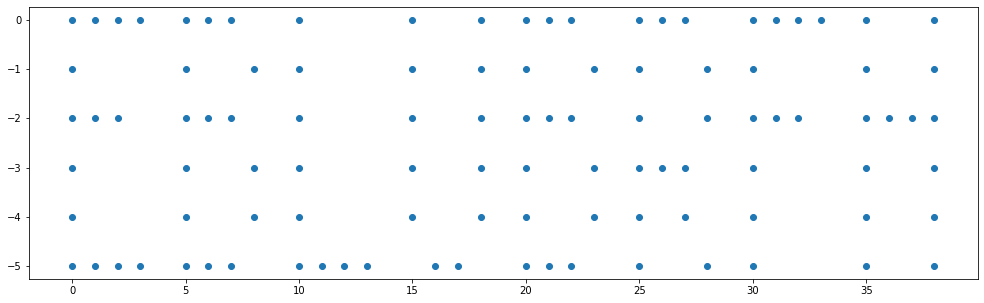

In [6]:
aoc_2021_13_2('input.txt')